# Ex02 - Resolução espacial e resolução radiométrica


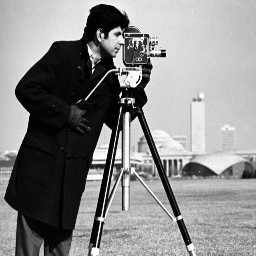

In [1]:
import numpy as np
from PIL import Image
img = Image.open('../data/cameraman.tif')
img

1. **Entendendo a resolução espacial:** Reproduza as figuras dos slides 10 e 11 (Aula2.pdf). Use, no lugar da imagem da rosa, a imagem do cameraman.
2. **Entendendo a resolução radiométrica:** Visualize a imagem do cameraman em níveis de cinza e altere progressivamente a quantização (slide 19).
3. **Explorando diferentes espaços de cores:** Abra uma imagem colorida (use as imagens existentes no diretório *data*) e visualize as 3 bandas RGB. Converta para uma imagem em níveis de cinza usando vários métodos e encontre uma forma (quantitativa) de comparar as diversas imagens em níveis de cinza obtidas:
    - convert(L) do PIL;
    - médias das bandas R, G, B;
    - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;
4. **Retomando a geração de imagens sintéticas:** Faça um programa qualquer de geração de imagem a partir de uma equação. Utilize a função *indices* do Numpy

### 1. Resolução espacial
* Percebi que é possível exibir todas as imagens dentro de um mesmo grid, mas não consegui fazer funcionar.
* Modifiquei para 50 dpi, para que a diferença de tamanho fique mais notável.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

img_array=np.array(img)
print(img_array.shape)

(256, 256)


In [3]:
def show_original_size(img, size):
    dpi = 50.
    figsize = size/dpi, size/dpi

    fig = plt.figure(figsize=figsize)
    
    fig.add_subplot(111).axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

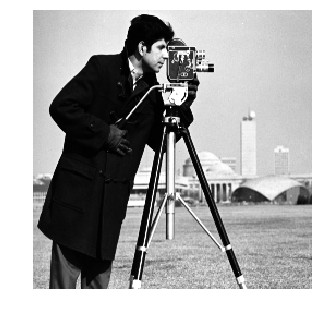

In [4]:
show_original_size(img_array, 256)

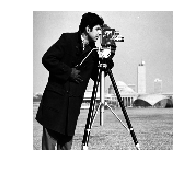

In [5]:
img128 = img_array[::2, ::2]
show_original_size(img128, 128)

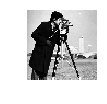

In [6]:
img64 = img_array[::4,::4]
show_original_size(img64, 64)

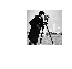

In [7]:
img32 = img_array[1::8,::8]
show_original_size(img32, 32)

#### O PIL tem métodos para reamostragem:

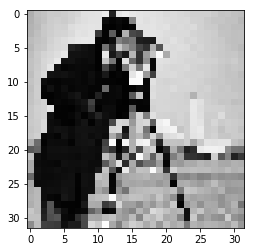

In [8]:
plt.imshow(img.resize((32,32)))
plt.show()

### 2. Resolução radiométrica


In [9]:
print('Intensidade máxima da imagem: {}'.format(np.max(np.array(img))))

print('Intensidade mínima da imagem: {}'.format(np.min(np.array(img))))

Intensidade máxima da imagem: 251
Intensidade mínima da imagem: 0


#### Conversão

b = profundidade original

p = nova profundidade

y = novo valor do pixel

x = valor original do pixel

\begin{equation*}
y = \Bigl(\frac{2^p}{2^b}\Bigr)x
\end{equation*}


#### Tirei o log2 do máximo da imagem para imprimir a profundidade.
* O laço foi para exibir em diferentes resoluções

8-bit


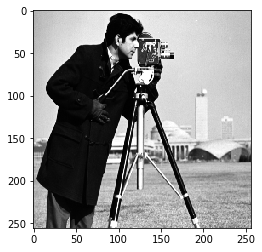

7-bit


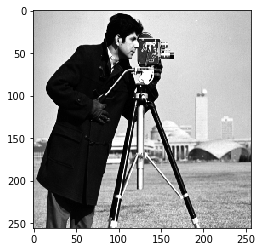

6-bit


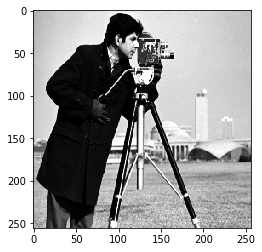

5-bit


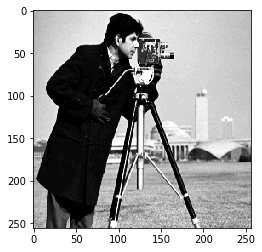

4-bit


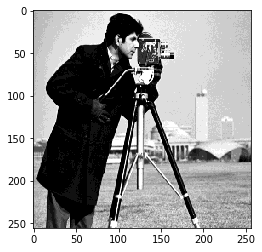

3-bit


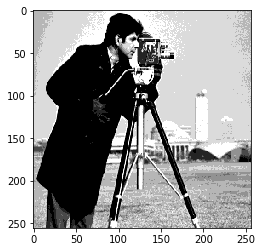

2-bit


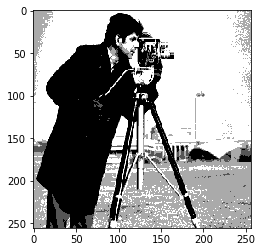

1-bit


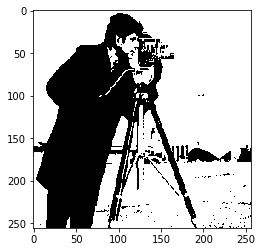

In [10]:
depths = [8, 7, 6, 5, 4, 3, 2, 1]

for p in depths:
    old_res = 2**8
    new_res = 2**p

    img_new = ((new_res/old_res) * np.array(img)).astype(int)

    print( '{}-bit'.format(int( np.log2(np.max((img_new))) + 1 )))

    plt.imshow(img_new, cmap='gray')
    plt.show()

### 3. Espaço de cores

#### Imagem escolhida: boat.tif
* Para exibir as bandas separadamente, eu escolhi zerar duas das bandas e exibir a imagem como RGB.

(257, 256, 3)


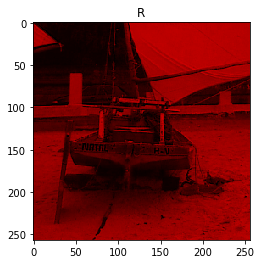

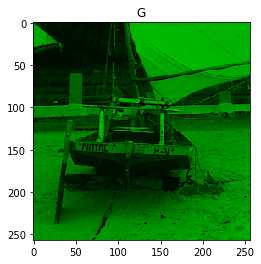

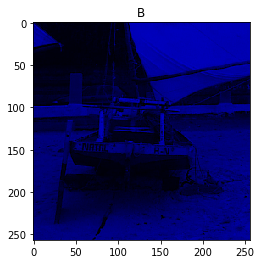

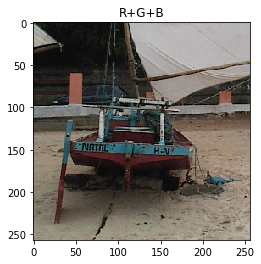

In [11]:
boat = Image.open('../data/boat.tif')
boat_array = np.array(boat)
print(boat_array.shape)

R = np.copy(boat)
G = np.copy(boat)
B = np.copy(boat)

R[:,:, 1::] = 0
G[:,:, ::2] = 0
B[:,:, :2:] = 0

plt.title('R')
plt.imshow(R)
plt.show()

plt.title('G')
plt.imshow(G)
plt.show()

plt.title('B')
plt.imshow(B)
plt.show()

plt.title('R+G+B')
plt.imshow(R+G+B)
plt.show()

#### Com PIL

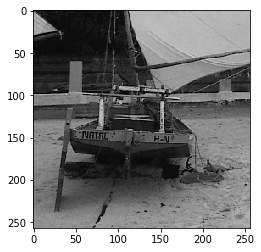

In [12]:
pil_converted = boat.convert("L")
plt.imshow(pil_converted)
plt.show()

* Para tirar a média das bandas, utilizei a função numpy.mean do último eixo do array.

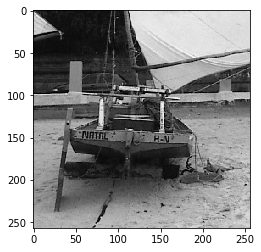

In [13]:
M = np.mean(boat_array, axis=2)

plt.imshow(M, cmap='gray')
plt.show()

##### Qual o problema da imagem abaixo?
* Tipo uint8!

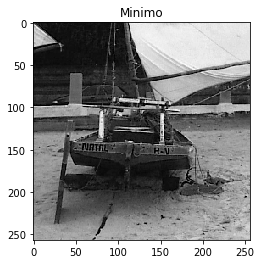

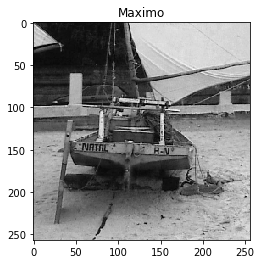

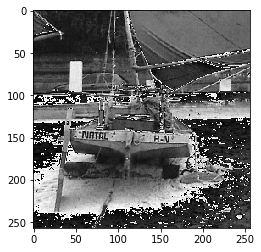

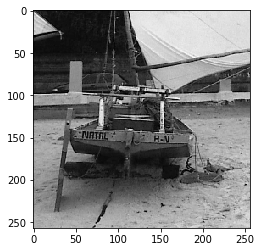

In [14]:
boat_min = np.min(boat_array, axis=2)
boat_max = np.max(boat_array, axis=2)

lightness = (boat_max+boat_min)//2

plt.title('Minimo')
plt.imshow(boat_min, cmap='gray')
plt.show()

plt.title('Maximo')
plt.imshow(boat_max, cmap='gray')
plt.show()

plt.title('')
plt.imshow((boat_max+boat_min)//2, cmap='gray')
plt.show()

boat_min = np.min(boat_array, axis=2).astype(int)
boat_max = np.max(boat_array, axis=2).astype(int)
lightness_int = (boat_max+boat_min)//2
plt.imshow(lightness_int, cmap='gray')
plt.show()


#### Ponderada.
Pelas fontes:

https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/

https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale


Existem algumas conversões. Não consegui obter esse dado com certeza. Algumas recomendções utilizadas são ITU-R 601:

* 0.2126 \* R + 0.7152 \* G + 0.0722 \* B

E ITU-R 709, aparentemente, o método convert do PIL [1], utiliza:

* 0.299 \* R + 0.587 \* G + 0.114 \* B

[1] http://effbot.org/imagingbook/image.htm

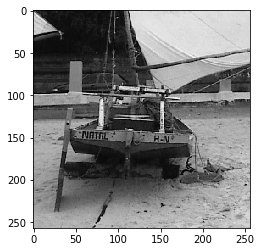

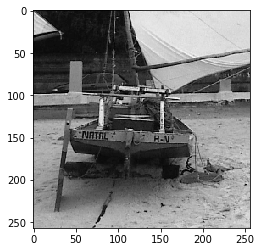

In [15]:
luma1 = (boat_array[:,:,0]*.2126 + boat_array[:,:,1]*.7152 + boat_array[:,:,2]*.0722).astype(np.uint8)
plt.imshow(luma1, cmap='gray')
plt.show()

luma2 = (boat_array[:,:,0]*.299 + boat_array[:,:,1]*.587 + boat_array[:,:,2]*.114 ).astype(np.uint8)
plt.imshow(luma2, cmap='gray')
plt.show()

#### Tentando quantificar cada imagem gerada
* Uma maneira de se comparar duas matrizes, seria por alguma norma matricial. Pela norma de frobenius, podemos comparar a distância entre a matriz gerada pela API e as matrizes da média aritmética e da média ponderada. Felizmente, o numpy tem um método que calcula norma de matrizes.
* Nota-se que a recomendação utilizada em luma2 fica próxima, mas não idêntica à utilizada pelo PIL. Por quê? Provavelmente erro de arredondamento.

In [16]:
print('Conversão do PIL: \n\t{}'.format(np.linalg.norm(pil_converted)))
print('Média aritmética: \n\t{}'.format(np.linalg.norm(M)))
print('Rec 601: \n\t{}'.format(np.linalg.norm(luma1)))
print('Rec 709: \n\t{}'.format(np.linalg.norm(luma2)))

Conversão do PIL: 
	28514.942591560655
Média aritmética: 
	28244.0387456657
Rec 601: 
	28460.496060328955
Rec 709: 
	28513.40384801506


### 4. Geração de imagens sintéticas

### y = x - 50

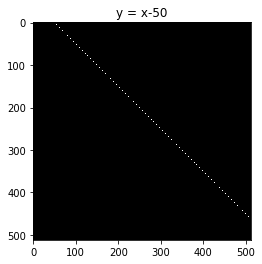

In [17]:
y, x = np.indices((512, 512))
f = (y == ((x - 50)))

plt.title('y = x-50')
plt.imshow(f, cmap='gray')
plt.show()



* Eu sei que não há muita utilidade, mas quis deixar a origem no canto inferior esquerdo:

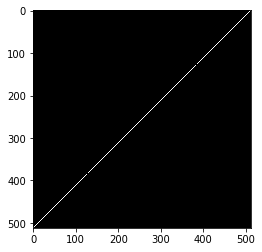

In [18]:
f = (y == ((np.max(x)-x)))
plt.imshow(f, cmap='gray')
plt.show()

### y = constante

 * Ficou muito difícil de enxergar. Eu poderia redimensionar x e y ou exibir apenas uma seção da imagem.

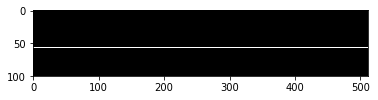

In [19]:
f = (y == 256)

# Mostrando apenas uma seção da imagem
plt.imshow(f[200:300:,::], cmap='gray')
plt.show()

* Experimentando com meshgrid

    * Função y = x² - 20

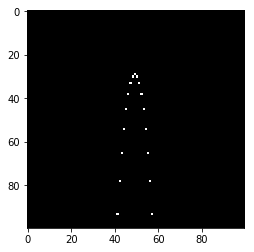

In [20]:
y, x = np.meshgrid(np.linspace(-49, 50, 100), np.linspace(-49, 50, 100), indexing='ij')

f = (y == x**2 - 20)

plt.imshow(f, cmap='gray')
plt.show()

* Que tal y = x³?

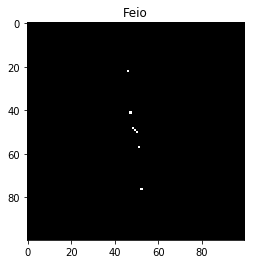

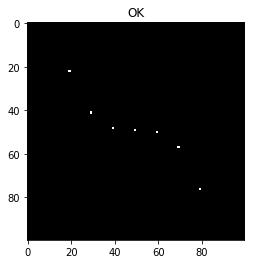

In [21]:
f = (y == x**3)

plt.title('Feio')
plt.imshow(f, cmap='gray')
plt.show()

# Ficou horrivel, para melhor visualização, talvez seria melhor alongar a curva no eixo x
f = (y == (x/10)**3)
plt.title('OK')
plt.imshow(f, cmap='gray')
plt.show()

### Pelo exemplo do tutorial, circunferência com raio 20, deslocado no eixo x em 10 unidades e no eixo y em 20 unidades

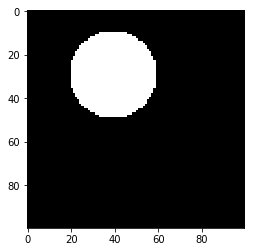

In [22]:
f = (((x+10)**2 + (y+20)**2) < 20**2)
plt.imshow(f, cmap='gray')
plt.show()